In [1]:
#Now that we have a fully cleaned dataset, we can start Exploratory Data Analysis (EDA) in Python.
#Lets focus on airline and airport performance first, then trends and delay causes.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv("Airline_Delay_Cleaned.csv")

# Quick check
df.head()


,year,month,carrier_code,carrier_name,airport_code,airport_name,total_flights,delayed_flights_15min,carrier_delay_count,weather_delay_count,...,late_aircraft_delay_minutes,date,delay_rate,avg_delay_per_delayed_flight,season,carrier_delay_pct,weather_delay_pct,nas_delay_pct,security_delay_pct,late_aircraft_delay_pct
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,29.0,2022-05-01,0.051471,36.428571,Spring,0.870588,0.000000,0.015686,0.0,0.113725
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,452.0,2022-05-01,0.175824,55.250000,Spring,0.397059,0.000000,0.091629,0.0,0.511312
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,28.0,2022-05-01,0.105263,69.000000,Spring,0.028986,0.000000,0.768116,0.0,0.202899
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,202.0,2022-05-01,0.159091,67.642857,Spring,0.617740,0.036959,0.131996,0.0,0.213305
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,59.0,2022-05-01,0.104972,42.526316,Spring,0.819307,0.000000,0.107673,0.0,0.073020


In [2]:
#Step 2: Airline-Level Analysis
#2.1 Total Flights & Total Delays per Airline

airline_summary = df.groupby('carrier_name').agg(
    total_flights=('total_flights', 'sum'),
    total_delays=('delayed_flights_15min', 'sum'),
    avg_delay_rate=('delay_rate', 'mean'),
    avg_delay_minutes=('avg_delay_per_delayed_flight', 'mean')
).sort_values(by='total_delays', ascending=False)

airline_summary.head(10)



,total_flights,total_delays,avg_delay_rate,avg_delay_minutes
carrier_name,,,,
Southwest Airlines Co.,22053649.0,4053401.0,0.194113,47.557377
American Airlines Inc.,12971696.0,2609248.0,0.215294,55.463903
Delta Air Lines Inc.,13690415.0,2179117.0,0.163689,52.454576
SkyWest Airlines Inc.,11455015.0,1984694.0,0.176006,58.307739
United Air Lines Inc.,9254443.0,1814691.0,0.207216,58.590121
ExpressJet Airlines Inc.,7113679.0,1529090.0,0.209673,56.689499
American Eagle Airlines Inc.,5184465.0,1129087.0,0.228136,49.830490
US Airways Inc.,5188612.0,997160.0,0.197700,45.221795
JetBlue Airways,4026171.0,953367.0,0.228453,59.246262


C:\Users\likhi\AppData\Local\Temp\ipykernel_27696\2344059084.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


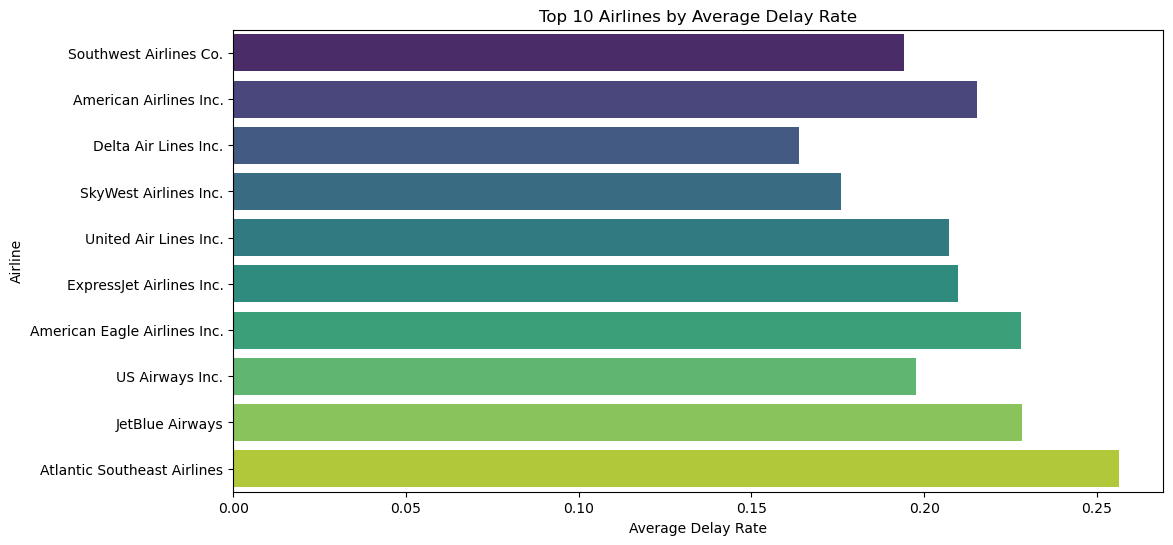

In [3]:
## Visualize Airline delay Rate
# Top 10 airlines by total delays
top_airlines = airline_summary.head(10)

plt.figure(figsize=(12,6))
sns.barplot(
    x='avg_delay_rate', 
    y=top_airlines.index, 
    data=top_airlines,
    palette="viridis"
)
plt.xlabel("Average Delay Rate")
plt.ylabel("Airline")
plt.title("Top 10 Airlines by Average Delay Rate")
plt.show()


In [4]:
##Step 3: Airport-Level Analysis
#3.1 Total Flights & Total Delays per Airport
airport_summary = df.groupby('airport_name').agg(
    total_flights=('total_flights', 'sum'),
    total_delays=('delayed_flights_15min', 'sum'),
    avg_delay_rate=('delay_rate', 'mean'),
    avg_delay_minutes=('avg_delay_per_delayed_flight', 'mean')
).sort_values(by='total_delays', ascending=False)

airport_summary.head(10)


,total_flights,total_delays,avg_delay_rate,avg_delay_minutes
airport_name,,,,
"Atlanta, GA: Hartsfield-Jackson Atlanta International",7259395.0,1332668.0,0.219683,56.986651
"Chicago, IL: Chicago O'Hare International",5852106.0,1276665.0,0.233697,65.664493
"Dallas/Fort Worth, TX: Dallas/Fort Worth International",5138129.0,923210.0,0.202069,55.906305
"Los Angeles, CA: Los Angeles International",4008346.0,765651.0,0.205483,51.187544
"Denver, CO: Denver International",4258254.0,749160.0,0.202005,51.532490
"San Francisco, CA: San Francisco International",2766227.0,677788.0,0.256383,57.118473
"Newark, NJ: Newark Liberty International",2385265.0,670034.0,0.285159,65.505391
"Houston, TX: George Bush Intercontinental/Houston",3267954.0,574012.0,0.205402,53.637378
"Las Vegas, NV: McCarran International",2909567.0,545101.0,0.196202,52.124223


C:\Users\likhi\AppData\Local\Temp\ipykernel_27696\3304750851.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


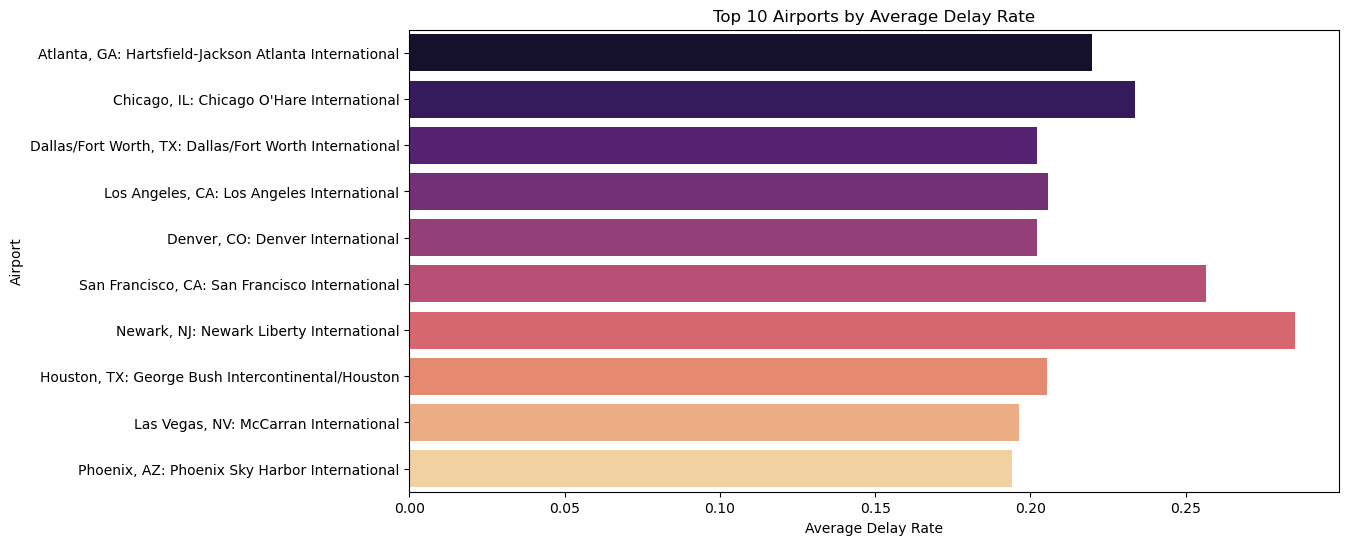

In [6]:
##3.2 Visualize Most Delay-Prone Airports
top_airports = airport_summary.head(10)

plt.figure(figsize=(12,6))
sns.barplot(
    x='avg_delay_rate', 
    y=top_airports.index, 
    data=top_airports,
    palette="magma",
    hue=None
)
plt.xlabel("Average Delay Rate")
plt.ylabel("Airport")
plt.title("Top 10 Airports by Average Delay Rate")
plt.legend([],[], frameon=False)
plt.show()



C:\Users\likhi\AppData\Local\Temp\ipykernel_27696\2609518490.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cause_summary.values, y=cause_summary.index, palette="coolwarm")


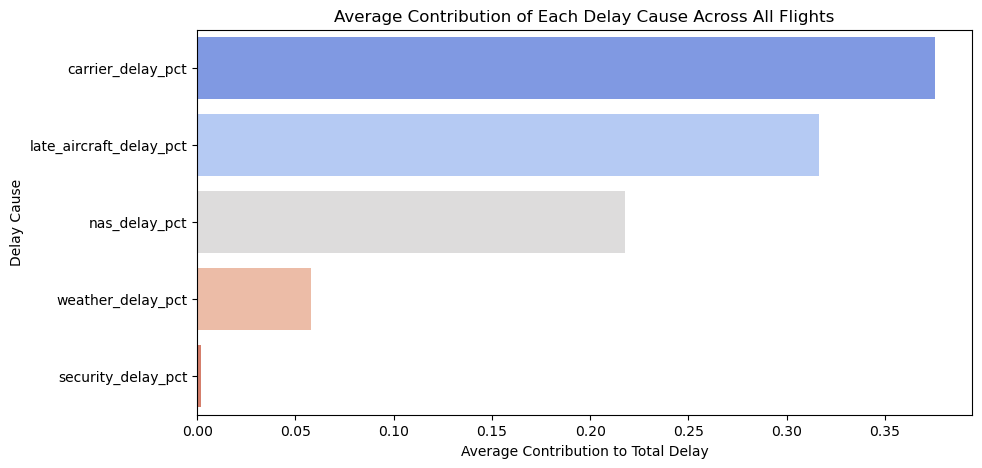

In [7]:
#Step 4: Delay Cause Analysis
#4.1 Average Contribution of Each Delay Cause
cause_cols = ['carrier_delay_pct','weather_delay_pct','nas_delay_pct','security_delay_pct','late_aircraft_delay_pct']
cause_summary = df[cause_cols].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=cause_summary.values, y=cause_summary.index, palette="coolwarm")
plt.xlabel("Average Contribution to Total Delay")
plt.ylabel("Delay Cause")
plt.title("Average Contribution of Each Delay Cause Across All Flights")
plt.show()


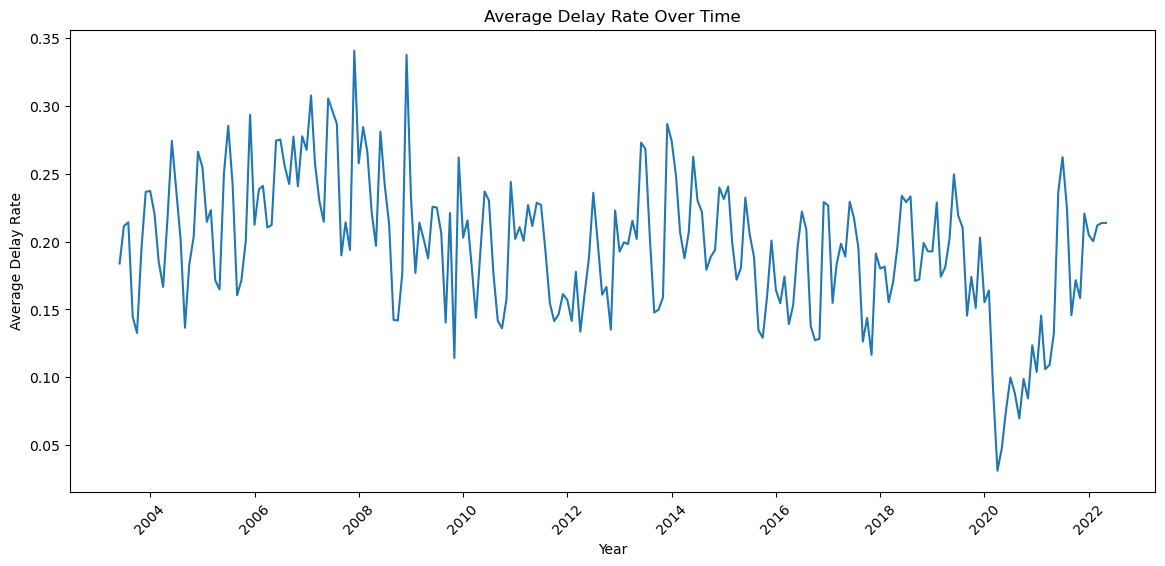

In [15]:
#Step 5: Time-Series Trend Analysis
#5.1 Total Delays Over Time
time_summary = df.groupby('date').agg(
    total_flights=('total_flights','sum'),
    total_delays=('delayed_flights_15min','sum'),
    avg_delay_rate=('delay_rate','mean')
).reset_index()


import matplotlib.dates as mdates

plt.figure(figsize=(14,6))
sns.lineplot(x='date', y='avg_delay_rate', data=time_summary)

# Major ticks every 2 years
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.title("Average Delay Rate Over Time")
plt.xlabel("Year")
plt.ylabel("Average Delay Rate")
plt.xticks(rotation=45)
plt.show()




C:\Users\likhi\AppData\Local\Temp\ipykernel_27696\764786619.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


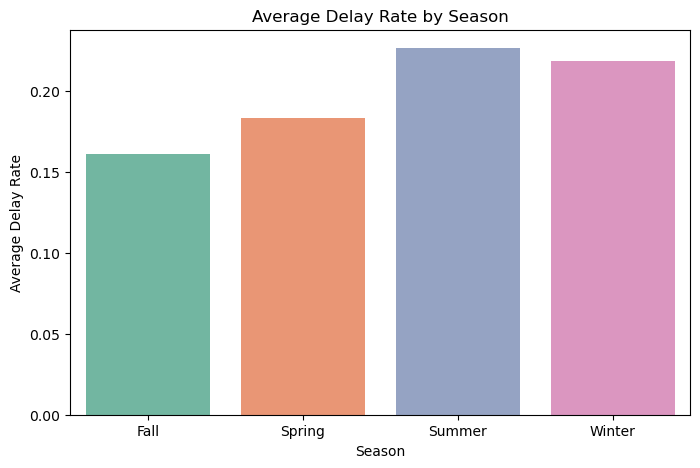

In [10]:
#5.2 Seasonal Delay Patterns
# Reset index to turn 'season' into a column
season_summary = df.groupby('season').agg(
    avg_delay_rate=('delay_rate','mean')
).reset_index()  # now 'season' is a column

# Correct barplot
plt.figure(figsize=(8,5))
sns.barplot(
    x='season', 
    y='avg_delay_rate', 
    data=season_summary,
    palette="Set2",
    hue=None
)
plt.title("Average Delay Rate by Season")
plt.xlabel("Season")
plt.ylabel("Average Delay Rate")
plt.legend([],[], frameon=False)
plt.show()

